In [27]:
#@title
# STEP 1.1

!git clone https://github.com/sorki/python-mnist
!.\python-mnist\bin\mnist_get_data.sh
!pip3 install emnist


print("Imported the EMNIST libraries we need!")

fatal: destination path 'python-mnist' already exists and is not an empty directory.


Defaulting to user installation because normal site-packages is not writeable
Imported the EMNIST libraries we need!


In [129]:
from emnist import extract_training_samples

X, y = extract_training_samples('letters')

X = X / 255.

X_train, X_test = X[:115000], X[115000:]
y_train, y_test = y[:115000], y[115000:]

X_train = X_train.reshape(115000,784)
X_test = X_test.reshape(9800,784)


Image Label: u


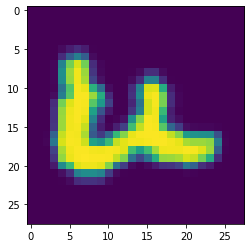

In [85]:
import matplotlib.pyplot as plt
img_index = 15
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))


In [39]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp1

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=20,
              random_state=1, solver='sgd', verbose=10)

In [40]:
mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732
Training set score: 0.886500
Test set score: 0.840800


c:\program files\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


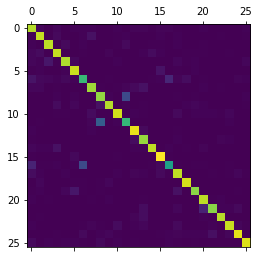

In [41]:
y_pred = mlp1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)


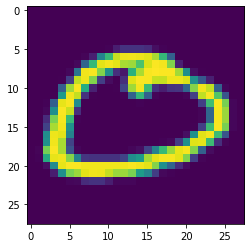

In [114]:
actual_letter='o'
example=[]
for i in range(len(y_test)):
    if(y_test[i] == (ord(actual_letter) - 96)):
        example.append(i)
example_number = 34
img= X_test[example[example_number]]
plt.imshow(img.reshape((28,28)))

There were 6 times that the letter a was predicted to be the letter b.


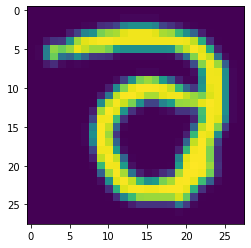

In [101]:
predicted_letter = 'b'
actual_letter = 'a'

mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

mistake_to_show = 3

if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

In [130]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.85506685
Iteration 2, loss = 0.46084530
Iteration 3, loss = 0.39081550
Iteration 4, loss = 0.35977878
Iteration 5, loss = 0.32918343
Iteration 6, loss = 0.31202360
Iteration 7, loss = 0.29555861
Iteration 8, loss = 0.28590274
Iteration 9, loss = 0.27264474
Iteration 10, loss = 0.26588933
Iteration 11, loss = 0.25706963
Iteration 12, loss = 0.25124108
Iteration 13, loss = 0.24724325
Iteration 14, loss = 0.24244171
Iteration 15, loss = 0.24151382
Iteration 16, loss = 0.23757170
Iteration 17, loss = 0.23116245
Iteration 18, loss = 0.23075645
Iteration 19, loss = 0.22431043
Iteration 20, loss = 0.22400543
Iteration 21, loss = 0.22139200
Iteration 22, loss = 0.22327295
Iteration 23, loss = 0.21775089
Iteration 24, loss = 0.22138782
Iteration 25, loss = 0.21577010
Iteration 26, loss = 0.21112976
Iteration 27, loss = 0.21033383
Iteration 28, loss = 0.21605948
Iteration 29, loss = 0.21480054
Iteration 30, loss = 0.21296535
Iteration 31, loss = 0.21166560
Iteration 32, los

In [143]:
!git clone https://github.com/DarukuFureinMasta/letritasAI

import os
path, dirs, files = next(os.walk("./letritasAI/ejemplosletras"))
files.sort()

fatal: destination path 'letritasAI' already exists and is not an empty directory.


Imágenes importadas


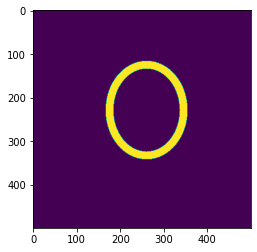

In [144]:
import cv2
import matplotlib.pyplot as plt
import numpy

letras_ejemplo=[]
for i in range(len(files)):
    img=cv2.imread("./letritasAI/ejemplosletras/"+files[i],cv2.IMREAD_GRAYSCALE)
    img=cv2.bitwise_not(img)
    letras_ejemplo.append(img)

print("Imágenes importadas")

plt.imshow(letras_ejemplo[0])

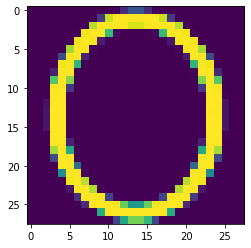

In [145]:
letras_procesadas=[]

for img in letras_ejemplo:
    img=cv2.GaussianBlur(img,(7,7),0)

    points = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(points)
    if (w > 0 and h > 0):
        if w > h:
            y = y - (w-h)//2
            img = img[y:y+w, x:x+w]
        else:
          x = x - (h-w)//2
          img = img[y:y+h, x:x+h]

    img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)

    img=img/255
    img=img.reshape((28,28))
    letras_procesadas.append(img)

import  matplotlib.pyplot as plt
plt.imshow(letras_procesadas[0])

In [146]:
import numpy

escritura=""
for letter in letras_procesadas:
    total_pixel_value=0
    for j in range(28):
        for k in range(28):
            total_pixel_value+=letter[j,k]
    if total_pixel_value < 20:
        escritura= escritura + " "
    else:
        single_item_array = (numpy.array(letter).reshape(1,784))
        prediction = mlp2.predict(single_item_array)
        escritura = escritura + str(chr(prediction[0]+96))

print("ya está prro")
print(escritura)

ya está prro
oscar estebwq


In [149]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
filename = 'finalized_model.sav'
pickle.dump(mlp2, open(filename, 'wb'))

In [151]:
mlp3=pickle.load(open(filename, 'rb'))
import numpy

escritura=""
for letter in letras_procesadas:
    total_pixel_value=0
    for j in range(28):
        for k in range(28):
            total_pixel_value+=letter[j,k]
    if total_pixel_value < 20:
        escritura= escritura + " "
    else:
        single_item_array = (numpy.array(letter).reshape(1,784))
        prediction = mlp3.predict(single_item_array)
        escritura = escritura + str(chr(prediction[0]+96))

print("ya está prro")
print(escritura)


ya está prro
oscar estebwq
